In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from transformers import pipeline
import ipywidgets as widgets
from IPython.display import display, HTML

In [2]:
# Download NLTK data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
# Step 2: Data Upload and Extraction
from google.colab import files

# Upload CSV file
df = pd.read_csv('personal_transactions.csv')

# Display the first few rows of the dataframe
df.head()


,Date,Description,Amount,Transaction Type,Category,Account Name
0,01-01-2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01-02-2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01-02-2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01-03-2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01-04-2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [4]:
# Step 3: Data Preprocessing
# Handle missing values
df.fillna('', inplace=True)

# Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y', errors='coerce')

# Display basic statistics
df.describe()


,Date,Amount
count,49,100.000000
mean,2018-02-08 04:24:29.387755008,271.298100
min,2018-01-01 00:00:00,2.000000
25%,2018-01-11 00:00:00,16.880000
50%,2018-02-09 00:00:00,35.475000
75%,2018-03-04 00:00:00,116.385000
max,2018-03-12 00:00:00,2298.090000
std,NaN,555.927068


In [5]:
# Step 4: NLP Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment of transaction descriptions
df['Sentiment'] = df['Description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display the dataframe with sentiment scores
df.head()


,Date,Description,Amount,Transaction Type,Category,Account Name,Sentiment
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card,0.1779
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking,0.0000
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card,0.0000
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card,0.3818
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card,0.0000


In [6]:
# Step 5: Model Training
# Initialize a text generation pipeline
# Use a pipeline as a high-level helper
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="TurkuNLP/gpt3-finnish-small")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/561 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/743M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/218 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.23M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

In [7]:
# Example: Generate a report summary
example_summary = pipe("Generate a financial report summary based on the following transactions: Amazon: $11.11, Netflix: $11.76, Mortgage Payment: $1247.44.",
                       max_length=200,
                       num_return_sequences=1,
                       truncation=True,
                       pad_token_id=pipe.tokenizer.eos_token_id)  # Set padding token to EOS

print(example_summary[0]['generated_text'])

Generate a financial report summary based on the following transactions: Amazon: $11.11, Netflix: $11.76, Mortgage Payment: $1247.44. Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon: $11.89, Amazon:


In [9]:
# Step 6: Report Generation
def generate_financial_report(transactions):
    summary_prompt = "Generate a financial report summary based on the following transactions:\n"
    for index, row in transactions.iterrows():
        summary_prompt += f"{row['Description']}: ${row['Amount']}, "

    summary = pipe(summary_prompt, max_length=1000, num_return_sequences=1,truncation=True)
    return summary[0]['generated_text']

# Generate the report
financial_report = generate_financial_report(df)
print(financial_report)


Generate a financial report summary based on the following transactions:
Amazon: $11.11, Mortgage Payment: $1247.44, Thai Restaurant: $24.22, Credit Card Payment: $2298.09, Netflix: $11.76, American Tavern: $25.85, Hardware Store: $18.45, Gas Company: $45.0, Hardware Store: $15.38, Spotify: $10.69, Phone Company: $89.46, Shell: $34.87, Grocery Store: $43.54, Biweekly Paycheck: $2000.0, Pizza Place: $32.91, Amazon: $39.05, Grocery Store: $44.19, American Tavern: $64.11, City Water Charges: $35.0, Power Company: $60.0, Biweekly Paycheck: $2000.0, Amazon: $50.21, Credit Card Payment: $554.99, Credit Card Payment: $309.81, Credit Card Payment: $554.99, Hardware Store: $17.38, Credit Card Payment: $309.81, Starbucks: $3.0, Internet Service Provider: $69.99, Shell: $30.42, Thai Restaurant: $25.0, Brunch Restaurant: $17.62, Grocery Store: $27.79, Amazon: $11.11, Mortgage Payment: $1247.44, Biweekly Paycheck: $2000.0, Japanese Restaurant: $57.02, Netflix: $11.76, Credit Card Payment: $145.14, 

In [10]:
import io  # Import the io module
import pandas as pd

In [11]:
##Monthly transactions
def create_monthly_summary(transactions):
    # Extract month and year from the Date column
    transactions['Month'] = transactions['Date'].dt.to_period('M')

    # Group by Month and calculate the sum of Amount for each group
    monthly_summary = transactions.groupby('Month').agg(
        Total_Amount=('Amount', 'sum'),
        Total_Transactions=('Amount', 'count')
    ).reset_index()

    # Save the monthly summary to a new CSV file
    monthly_summary.to_csv('monthly_summary.csv', index=False)

    return monthly_summary

In [12]:
monthly_summary = create_monthly_summary(df)
print(monthly_summary)

     Month  Total_Amount  Total_Transactions
0  2018-01       5875.86                  14
1  2018-02       4157.66                  16
2  2018-03       5143.02                  19


In [14]:
# Step 7: User Interface
# Upload CSV file widget
upload_widget = widgets.FileUpload(accept='.csv', multiple=False)

# Output widget for displaying the report
output_widget = widgets.Output()

# Button to generate the report
generate_button = widgets.Button(description="Generate Report")

def on_generate_button_clicked(b):
    with output_widget:
        output_widget.clear_output()

        # Read the uploaded CSV file
        uploaded_file = upload_widget.value
        if uploaded_file:
            csv_file = list(uploaded_file.values())[0]['content']
            df = pd.read_csv(io.StringIO(csv_file.decode('utf-8'))) # Use io.StringIO instead


            # Preprocess and analyze the data
            df.fillna('', inplace=True)
            df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y', errors='coerce')
            df['Sentiment'] = df['Description'].apply(lambda x: sia.polarity_scores(x)['compound'])

            # Generate the financial report
            report = generate_financial_report(df)
            print(report)

            # Create the monthly summary
            monthly_summary = create_monthly_summary(df)
            print(monthly_summary)
            print("Monthly summary saved to 'monthly_summary.csv'")
        else:
            print("Please upload a CSV file.")

generate_button.on_click(on_generate_button_clicked)

# Display the widgets
display(HTML("<h2>Upload your transaction CSV file</h2>"))
display(upload_widget)
display(generate_button)
display(output_widget)


FileUpload(value={}, accept='.csv', description='Upload')

Button(description='Generate Report', style=ButtonStyle())

Output()

# Data Visualization

<ipython-input-15-acf0870b391d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Total_Spending', data=monthly_total, palette='viridis')


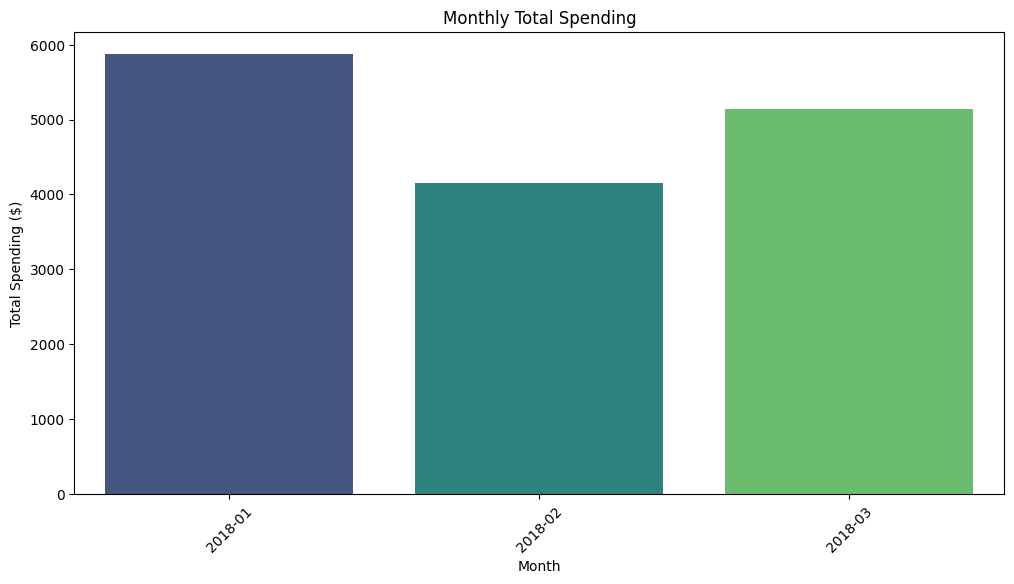

In [15]:
# Visualization 1: Monthly Total Spending
import matplotlib.pyplot as plt
import seaborn as sns

def plot_monthly_total_spending(transactions):
    transactions['Month'] = transactions['Date'].dt.to_period('M')
    monthly_total = transactions.groupby('Month').agg(Total_Spending=('Amount', 'sum')).reset_index()
    monthly_total['Month'] = monthly_total['Month'].astype(str)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Month', y='Total_Spending', data=monthly_total, palette='viridis')
    plt.title('Monthly Total Spending')
    plt.xlabel('Month')
    plt.ylabel('Total Spending ($)')
    plt.xticks(rotation=45)
    plt.show()

plot_monthly_total_spending(df)

<ipython-input-16-6116550518c7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Spending', y='Category', data=category_total, palette='viridis')


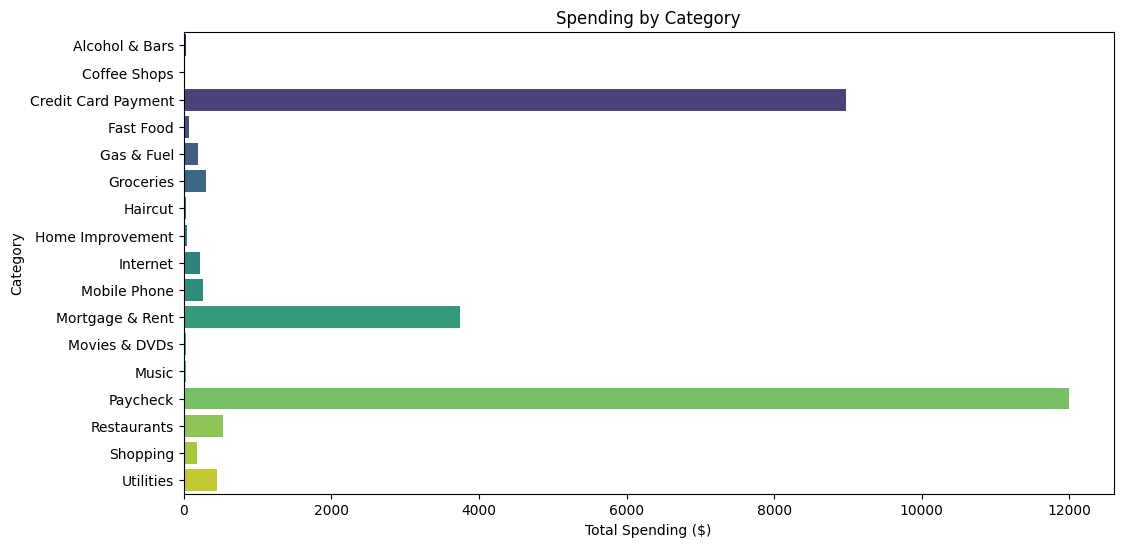

In [16]:
# Visualization 2: Spending by Category
def plot_spending_by_category(transactions):
    category_total = transactions.groupby('Category').agg(Total_Spending=('Amount', 'sum')).reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Total_Spending', y='Category', data=category_total, palette='viridis')
    plt.title('Spending by Category')
    plt.xlabel('Total Spending ($)')
    plt.ylabel('Category')
    plt.show()

plot_spending_by_category(df)

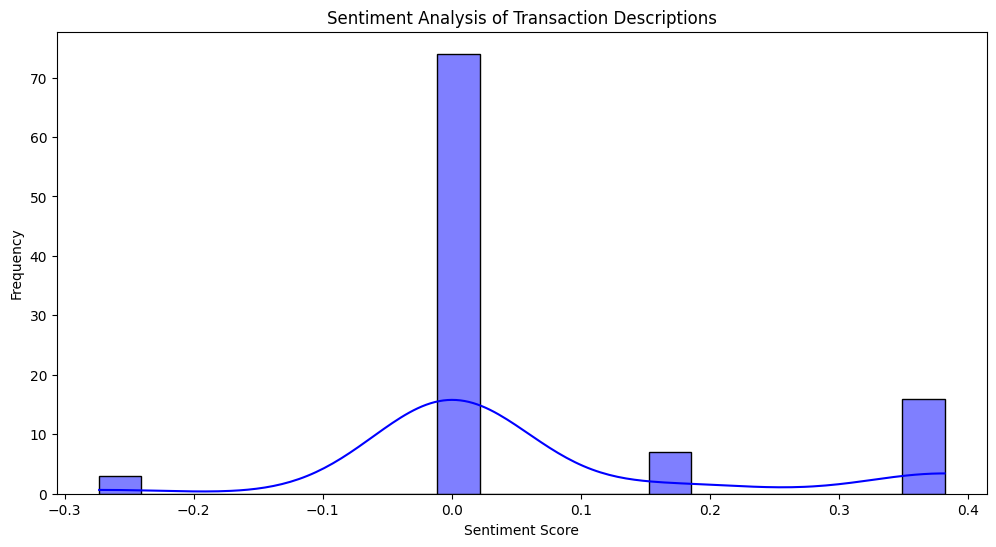

In [17]:
# Visualization 3: Sentiment Analysis of Transaction Descriptions
def plot_sentiment_analysis(transactions):
    plt.figure(figsize=(12, 6))
    sns.histplot(transactions['Sentiment'], bins=20, kde=True, color='blue')
    plt.title('Sentiment Analysis of Transaction Descriptions')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

plot_sentiment_analysis(df)

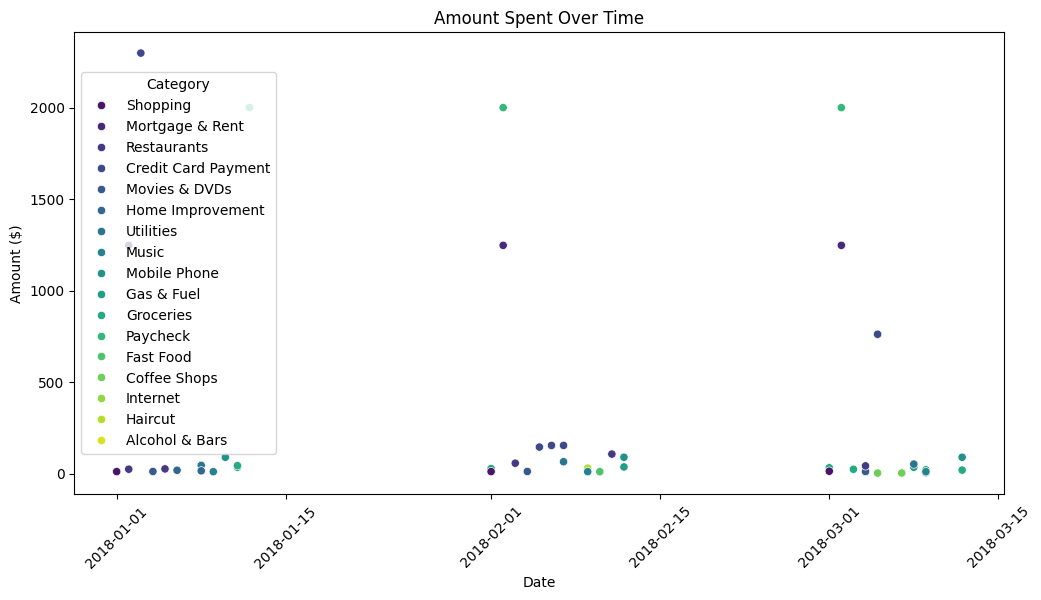

In [18]:
# Visualization 4: Scatter Plot of Amount Spent Over Time
def plot_amount_over_time(transactions):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Date', y='Amount', data=transactions, hue='Category', palette='viridis')
    plt.title('Amount Spent Over Time')
    plt.xlabel('Date')
    plt.ylabel('Amount ($)')
    plt.xticks(rotation=45)
    plt.show()

plot_amount_over_time(df)

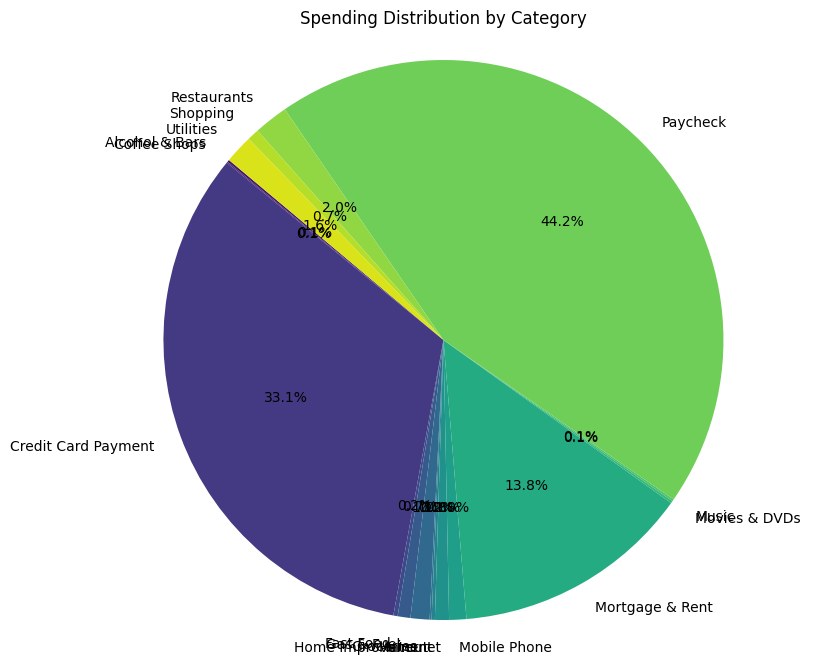

In [19]:
# Visualization 5: Pie Chart of Spending by Category
def plot_pie_chart_by_category(transactions):
    category_total = transactions.groupby('Category').agg(Total_Spending=('Amount', 'sum')).reset_index()

    plt.figure(figsize=(10, 8))
    plt.pie(category_total['Total_Spending'], labels=category_total['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(category_total)))
    plt.title('Spending Distribution by Category')
    plt.axis('equal')
    plt.show()

plot_pie_chart_by_category(df)
